# Testing Augmentation 

In this file I test out augmentation schemes on the claim vector images. All of the other data inputs can treated as simple images, but since the claim vectors use relative coordinates we need to make sure there are consistent even after transformations are applied 

In [5]:
import flow_vis
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from astropy.io import fits
from scipy.ndimage import rotate, shift

In [6]:
# Scale function currently used on flux images in logging
def scale_image(data):

    ox = int(data.shape[0]/4)
    oy = int(data.shape[1]/4)
    nx = int(data.shape[0]/2)
    ny = int(data.shape[1]/2)

    s = np.std(data[ox:ox+nx,oy:oy+ny])
    m = np.mean(data[ox:ox+nx,oy:oy+ny])

    ret = (data-m)/s
    ret = np.log10((data-m)/s + 1.0e-6 - (data-m).min()/s)
    m = np.mean(ret)
    s = np.std(ret)

    ret[ret<m-0.5*s] = m-0.5*s
    ret[ret>m+2.0] = m+2.0
    ret = (ret - ret.min())/(ret.max()-ret.min())
    return ret

In [7]:
flux = fits.getdata("vector_coloring_data/67-flux.fits")
background = fits.getdata("vector_coloring_data/67-background.fits")
center_of_mass = fits.getdata("vector_coloring_data/67-center_of_mass.fits")
claim_maps = fits.getdata("vector_coloring_data/67-claim_maps.fits")
claim_vectors = fits.getdata("vector_coloring_data/67-claim_vectors.fits")
claim_vectors.shape

(256, 256, 4, 5, 2)

In [21]:
def vertical_flip_img(img):
    return np.flipud(img)

def vertical_flip_cv(cv):
    flipped = np.flipud(cv)
    flipped[..., 0] = flipped[..., 0] * -1
    return flipped

def horizontal_flip_img(img):
    return np.fliplr(img)

def horizontal_flip_cv(cv):
    flipped = np.fliplr(cv)
    flipped[..., 1] = flipped[..., 1] * -1
    return flipped

def rotate_img(img, theta):
    return rotate(img, theta, reshape=False)

def rotate_cv(cv, theta):
    rotated = cv.copy()
    rotated = rotate(rotated, theta, reshape=False)

    sin_theta = np.sin(theta * (np.pi/180))
    cos_theta = np.cos(theta * (np.pi/180))
    
    y = rotated[..., 0].copy()
    x = rotated[..., 1].copy()

    rotated[..., 0] = sin_theta * x + cos_theta * y
    rotated[..., 1] = cos_theta * x - sin_theta * y

    return rotated

def translate_x_image(img, dx):
    return shift(img, (0, dx))

def translate_x_cv(cv, dx):
    shifted = cv.copy().reshape(list(cv.shape[:2]) + [-1])
    shifted = shift(shifted, (0, dx, 0))
    return shifted.reshape(cv.shape)

def translate_y_image(img, dy):
    return shift(img, (dy, 0))

def translate_y_cv(cv, dy):
    shifted = cv.copy().reshape(list(cv.shape[:2]) + [-1])
    shifted = shift(shifted, (dy, 0, 0))
    return shifted.reshape(cv.shape)

### Vertical Flip

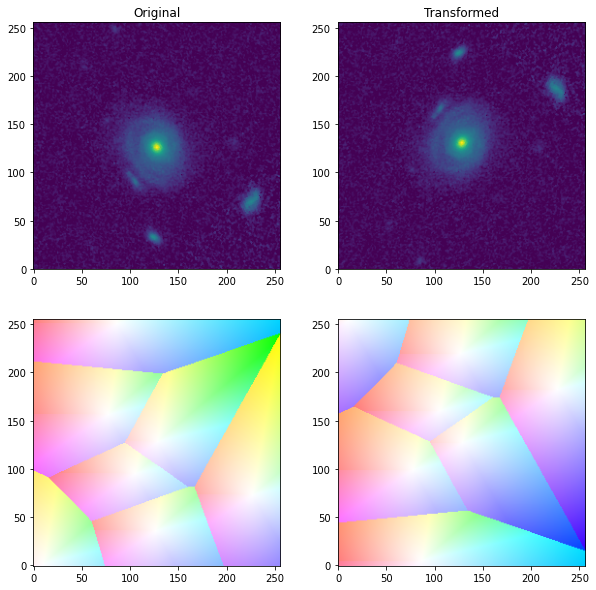

In [5]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

single_cv = claim_vectors[:, :, 0, 0, :].copy()
single_cv[:, :, 0]  = single_cv[:, :, 0] * -1

# Original ===============================================
ax[0, 0].imshow(scale_image(flux[..., 0]), origin="lower")
ax[0, 0].set_title("Original")

ax[1, 0].imshow(
    flow_vis.flow_to_color(
        single_cv[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)


# Transformed ===========================================
ax[0, 1].imshow(vertical_flip_img(scale_image(flux[..., 0])), origin="lower")
ax[0, 1].set_title("Transformed")

ax[1, 1].imshow(
    flow_vis.flow_to_color(
        vertical_flip_cv(single_cv)[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)

### Horizontal Flip

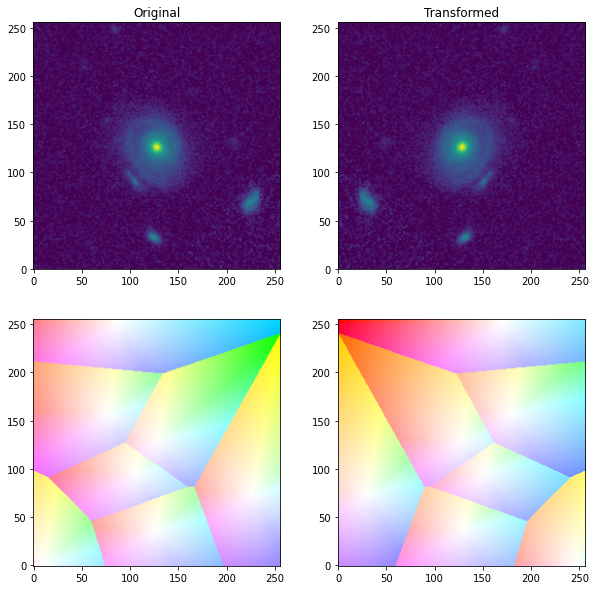

In [6]:
single_f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

single_cv = claim_vectors[:, :, 0, 0, :].copy()
single_cv[:, :, 0]  = single_cv[:, :, 0] * -1

# Original ===============================================
ax[0, 0].imshow(scale_image(flux[..., 0]), origin="lower")
ax[0, 0].set_title("Original")

ax[1, 0].imshow(
    flow_vis.flow_to_color(
        single_cv[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)


# Transformed ===========================================
ax[0, 1].imshow(horizontal_flip_img(scale_image(flux[..., 0])), origin="lower")
ax[0, 1].set_title("Transformed")

ax[1, 1].imshow(
    flow_vis.flow_to_color(
        horizontal_flip_cv(single_cv)[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)

### Rotation

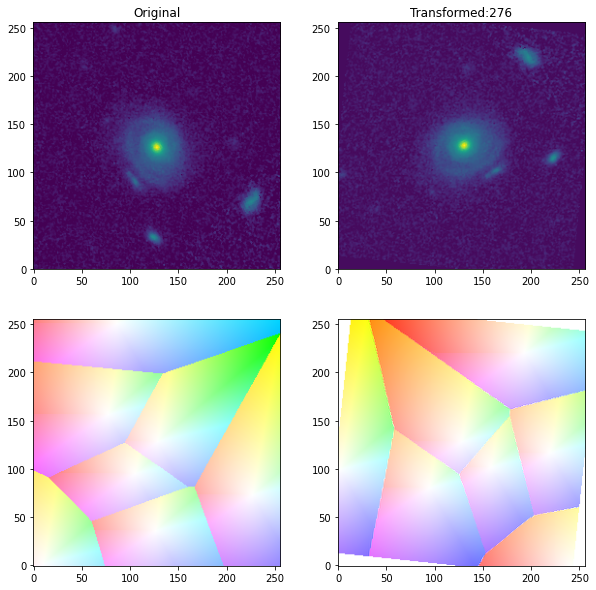

In [22]:
single_f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

single_cv = claim_vectors[:, :, 0, 0, :].copy()
single_cv[:, :, 0]  = single_cv[:, :, 0] * -1

# Original ===============================================
ax[0, 0].imshow(scale_image(flux[..., 0]), 
    origin="lower")
ax[0, 0].set_title("Original")

ax[1, 0].imshow(
    flow_vis.flow_to_color(
        single_cv[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)


# Transformed ===========================================
theta = int(np.random.uniform(0, 360))
ax[0, 1].imshow(rotate_img(scale_image(flux[..., 0]), theta), origin="lower")
ax[0, 1].set_title(f"Transformed:{theta}")

ax[1, 1].imshow(
    flow_vis.flow_to_color(
        rotate_cv(single_cv, theta)[..., [1, 0]],
        convert_to_bgr=False,
    ),
    origin="lower"
)

### Translation along x

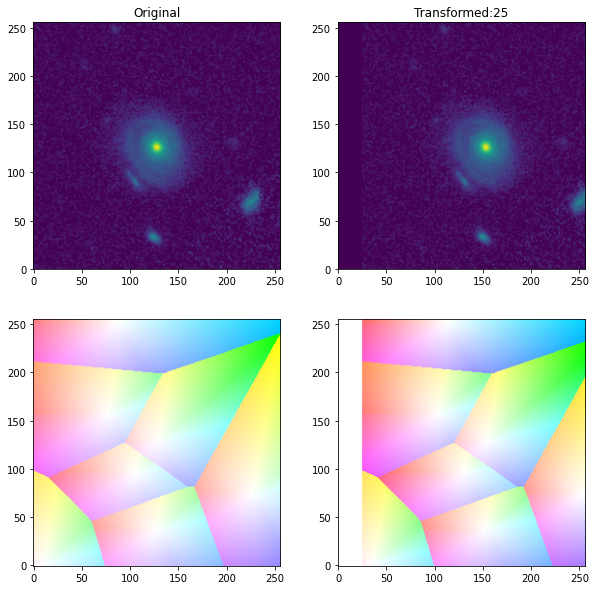

In [15]:
single_f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

single_cv = claim_vectors[:, :, 0, 0, :].copy()
single_cv[:, :, 0]  = single_cv[:, :, 0] * -1

# Original ===============================================
ax[0, 0].imshow(scale_image(flux[..., 0]), 
    origin="lower")
ax[0, 0].set_title("Original")

ax[1, 0].imshow(
    flow_vis.flow_to_color(
        single_cv[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)


# Transformed ===========================================
dx = 25
ax[0, 1].imshow(translate_x_image(scale_image(flux[..., 0]), dx), origin="lower")
ax[0, 1].set_title(f"Transformed:{dx}")

ax[1, 1].imshow(
    flow_vis.flow_to_color(
        translate_x_cv(single_cv, dx)[..., [1, 0]],
        convert_to_bgr=False,
    ),
    origin="lower"
)

### Translation along y

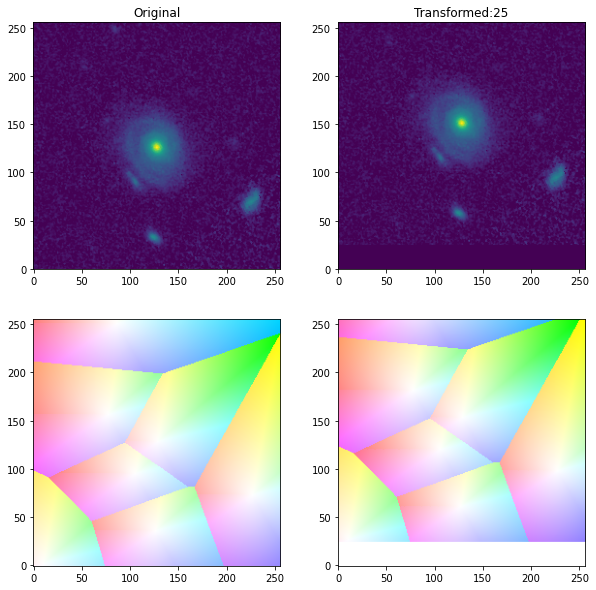

In [17]:
single_f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

single_cv = claim_vectors[:, :, 0, 0, :].copy()
single_cv[:, :, 0]  = single_cv[:, :, 0] * -1

# Original ===============================================
ax[0, 0].imshow(scale_image(flux[..., 0]), 
    origin="lower")
ax[0, 0].set_title("Original")

ax[1, 0].imshow(
    flow_vis.flow_to_color(
        single_cv[..., [1, 0]],
        convert_to_bgr=False
    ),
    origin="lower"
)


# Transformed ===========================================
dy = 25
ax[0, 1].imshow(translate_y_image(scale_image(flux[..., 0]), dy), origin="lower")
ax[0, 1].set_title(f"Transformed:{dy}")

ax[1, 1].imshow(
    flow_vis.flow_to_color(
        translate_y_cv(single_cv, dy)[..., [1, 0]],
        convert_to_bgr=False,
    ),
    origin="lower"
)